In [1]:
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# ERROR RECORD -> {'cod': '404', 'message': 'city not found'}
# ERROR PRINT -> City not found. Skipping...
# SUCCESS PRINT -> Processing Record 45 of Set 1 | saint-joseph

In [5]:
# Size of Chunks
n = 50

# Get 2D List of Cities (Chunks of Cities)
grouped_cities = list(divide_chunks(cities, n)) 

# Print first set
for city in (grouped_cities[1]):
    print(city)

te anau
arrecife
ahuimanu
tazovskiy
kruisfontein
kasungu
ushuaia
nizhneyansk
avarua
yendi
saint-francois
souillac
sabha
andarab
ponta do sol
barentsburg
port lincoln
butaritari
dudinka
east london
saleaula
vaini
hondo
bluff
lagoa
norman wells
atuona
hualmay
taoudenni
ormara
praia da vitoria
hoquiam
adrar
severo-kurilsk
nishihara
bonavista
sentyabrskiy
high rock
belchatow
mizdah
contamana
fairbanks
broome
boueni
bacuit
barrow
port blair
illoqqortoormiut
arraial do cabo
mataura


In [6]:
city = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [7]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")    
print("-----------------------------")

# LOOP THROUGH EVERYTHING
for set_index in range(len(grouped_cities)):
    for city_index in range(len(grouped_cities[set_index])):
        response = requests.get(query_url + grouped_cities[set_index][city_index]).json()
        if response['cod'] == "404":
            print("City not found. Skipping...")
        else:
            print(f"Processing Record {city_index + 1} of set {set_index + 1} | {grouped_cities[set_index][city_index]}")

            city.append(response["name"])
            cloudiness.append(response["clouds"]["all"])
            country.append(response["sys"]["country"])
            date.append(response["dt"])
            humidity.append(response["main"]["humidity"])
            lat.append(response["coord"]["lat"])
            lng.append(response["coord"]["lon"])
            max_temp.append(response["main"]["temp_max"])
            wind_speed.append(response["wind"]["speed"])

        time.sleep(1)
   
    
#  LOOP THOUGH 1 CHUNK
# for city_index in range(len(grouped_cities[1])):
#     response = requests.get(query_url + grouped_cities[1][city_index]).json()
#     if response['cod'] == "404":
#         print("City not found. Skipping...")
#     else:
#         print(f"Processing Record {city_index + 1} | {grouped_cities[1][city_index]}")
        
#         city.append(response["name"])
#         cloudiness.append(response["clouds"]["all"])
#         country.append(response["sys"]["country"])
#         date.append(response["dt"])
#         humidity.append(response["main"]["humidity"])
#         lat.append(response["coord"]["lat"])
#         lng.append(response["coord"]["lon"])
#         max_temp.append(response["main"]["temp_max"])
#         wind_speed.append(response["wind"]["speed"])

        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | ust-maya
Processing Record 2 of set 1 | kapaa
City not found. Skipping...
Processing Record 4 of set 1 | esperance
Processing Record 5 of set 1 | lososina
Processing Record 6 of set 1 | rincon
Processing Record 7 of set 1 | khasan
Processing Record 8 of set 1 | jamestown
Processing Record 9 of set 1 | hasaki
Processing Record 10 of set 1 | wattegama
Processing Record 11 of set 1 | hermanus
Processing Record 12 of set 1 | honiara
Processing Record 13 of set 1 | mahebourg
Processing Record 14 of set 1 | ponta delgada
Processing Record 15 of set 1 | albany
Processing Record 16 of set 1 | punta arenas
Processing Record 17 of set 1 | thompson
Processing Record 18 of set 1 | tuatapere
Processing Record 19 of set 1 | longyearbyen
Processing Record 20 of set 1 | morant bay
Processing Record 21 of set 1 | puerto ayora
Processing Record 22 of set 1 | nikolskoye
Processing Record 23 of set 1 | port alfred
Proces

Processing Record 3 of set 5 | palmer
Processing Record 4 of set 5 | mogok
Processing Record 5 of set 5 | pacific grove
Processing Record 6 of set 5 | verkh-usugli
Processing Record 7 of set 5 | port elizabeth
Processing Record 8 of set 5 | opuwo
Processing Record 9 of set 5 | simplicio mendes
Processing Record 10 of set 5 | iqaluit
Processing Record 11 of set 5 | aquidauana
City not found. Skipping...
Processing Record 13 of set 5 | poronaysk
City not found. Skipping...
Processing Record 15 of set 5 | ribeira grande
Processing Record 16 of set 5 | salinopolis
Processing Record 17 of set 5 | sharon
Processing Record 18 of set 5 | timra
Processing Record 19 of set 5 | portland
Processing Record 20 of set 5 | ostrovnoy
Processing Record 21 of set 5 | san patricio
Processing Record 22 of set 5 | flinders
Processing Record 23 of set 5 | aransas pass
Processing Record 24 of set 5 | kourou
City not found. Skipping...
Processing Record 26 of set 5 | berdigestyakh
Processing Record 27 of set 5

Processing Record 9 of set 9 | makakilo city
Processing Record 10 of set 9 | san quintin
Processing Record 11 of set 9 | payo
Processing Record 12 of set 9 | santa cruz cabralia
Processing Record 13 of set 9 | kamiiso
Processing Record 14 of set 9 | bereznik
Processing Record 15 of set 9 | anju
Processing Record 16 of set 9 | riohacha
Processing Record 17 of set 9 | san jose
Processing Record 18 of set 9 | izhma
Processing Record 19 of set 9 | pangkalanbuun
Processing Record 20 of set 9 | vila franca do campo
Processing Record 21 of set 9 | narsaq
Processing Record 22 of set 9 | williamsport
Processing Record 23 of set 9 | bandrele
Processing Record 24 of set 9 | sibolga
Processing Record 25 of set 9 | iquique
Processing Record 26 of set 9 | bayji
Processing Record 27 of set 9 | vidim
Processing Record 28 of set 9 | pachino
Processing Record 29 of set 9 | svirstroy
Processing Record 30 of set 9 | soyo
Processing Record 31 of set 9 | soto la marina
Processing Record 32 of set 9 | takora

Processing Record 11 of set 13 | wawa
Processing Record 12 of set 13 | vaitape
Processing Record 13 of set 13 | santa maria
-----------------------------
Data Retrieval Complete
-----------------------------


In [8]:
# EXAMPLE JSON
# response = requests.get(query_url + "teguldet").json()
# pprint(response)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# NEED: City_ID, City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max, Temp, Wind, Speed

In [10]:
# PRACTICE RETRIEVING DATA & STORING IT

# city.append(response["name"])
# cloudiness.append(response["clouds"]["all"])
# country.append(response["sys"]["country"])
# date.append(response["dt"])
# humidity.append(response["main"]["humidity"])
# lat.append(response["coord"]["lat"])
# lng.append(response["coord"]["lon"])
# max_temp.append(response["main"]["temp_max"])
# wind_speed.append(response["wind"]["speed"])

# weather_df = pd.DataFrame({"City": [city], "Cloudiness": [cloudiness],"Country": [country], "Date": [date], "Humidity": [humidity], "Lat": [lat], "Lng": [lng], "Max Temp": [max_temp], "Wind Speed": [wind_speed]})
# weather_df

In [11]:
# PRINT DATAFRAME

weather_df = pd.DataFrame({"City": city, "Cloudiness": cloudiness,"Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})
weather_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ust-Maya,0,RU,1580243149,97,60.42,134.53,-37.91,0.50
1,Kapaa,1,US,1580242946,68,22.08,-159.32,26.00,1.69
2,Esperance,90,AU,1580242946,100,-33.87,121.90,19.00,3.60
3,Lososina,27,RU,1580243153,94,49.00,140.31,-12.79,3.60
4,Rincon,20,US,1580243154,36,32.30,-81.24,17.22,4.10


In [12]:
weather_df.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [13]:
# TEACHER OUTPUT

In [14]:
# Get Date
ts = int(date[0])

readable_date = (datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d'))

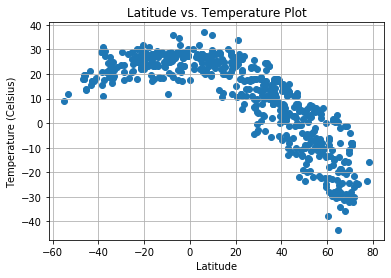

In [15]:
# Build a scatter plot for each data type
plt.scatter(lat, max_temp, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/TemperaturebyLat.png")

# Show plot
plt.show()

It is hottest around the equator. As you move away from the equator in either direction (North or South), it gets colder

#### Latitude vs. Humidity Plot

In [16]:
# TEACHER OUTPUT

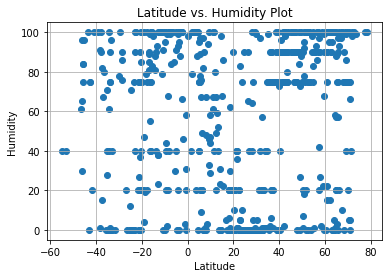

In [17]:
# Build a scatter plot for each data type
plt.scatter(lat, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/HumiditybyLat.png")

# Show plot
plt.show()

I dont see a pattern with humidity vs Lat. To me, humidity would be related to proximity to water which is irrespective of Lat.
Although we do see strong emphasis at specific Lat

#### Latitude vs. Cloudiness Plot

In [18]:
# TEACHER OUTPUT

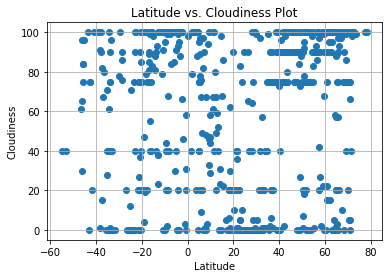

In [19]:
# Build a scatter plot for each data type
plt.scatter(lat, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/CloudinessbyLat.png")

# Show plot
plt.show()

I see a strong emphasis at specific Lat for Cloudiness. This makes sense given the air flow

#### Latitude vs. Wind Speed Plot

In [20]:
# TEACHER OUTPUT

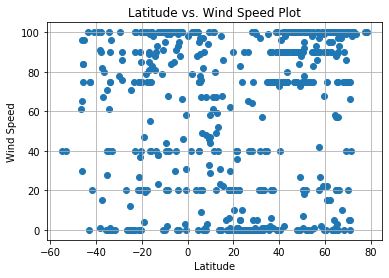

In [21]:
# Build a scatter plot for each data type
plt.scatter(lat, cloudiness, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/wind_speedbyLat.png")

# Show plot
plt.show()

I see a strong emphasis at specific Lat for wind speed. This makes sense given the air flow

## Linear Regression

In [22]:
# OPTIONAL: Create a function to create Linear Regression plots

In [23]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
# TEACHER OUTPUT

In [25]:
northern_df = weather_df.loc[weather_df["Lat"] > 0,:]
northern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ust-Maya,0,RU,1580243149,97,60.42,134.53,-37.91,0.50
1,Kapaa,1,US,1580242946,68,22.08,-159.32,26.00,1.69
3,Lososina,27,RU,1580243153,94,49.00,140.31,-12.79,3.60
4,Rincon,20,US,1580243154,36,32.30,-81.24,17.22,4.10
5,Khasan,100,RU,1580243156,78,42.43,130.64,-6.15,1.80


In [26]:
southern_df = weather_df.loc[weather_df["Lat"] < 0,:]
southern_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
2,Esperance,90,AU,1580242946,100,-33.87,121.90,19.00,3.60
9,Hermanus,100,ZA,1580243160,96,-34.42,19.23,18.33,2.24
10,Honiara,20,SB,1580243161,94,-9.43,159.95,25.00,0.80
11,Mahebourg,20,MU,1580243162,88,-20.41,57.70,23.00,1.00
14,Punta Arenas,40,CL,1580242956,53,-53.15,-70.92,12.00,14.90


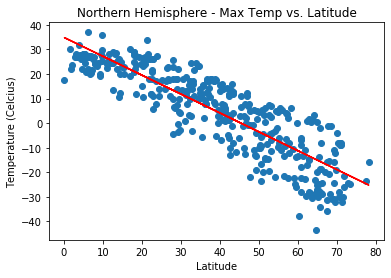

The equation of the regression line is: y = -0.77x + 34.93
The r-squared is: -0.8690708979307299


In [27]:
# gather regression data

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Max Temp vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Temperature (Celcius)")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is a strong negative coorelation between lower temps and higher lats in the north
makes sense - as you travel to the north pole, it gets colder

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [28]:
# TEACHER OUTPUT

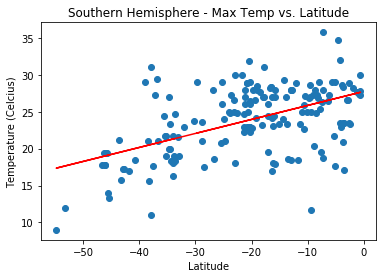

The equation of the regression line is: y = 0.19x + 27.75
The r-squared is: 0.5241125994734381


In [29]:
# gather regression data

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Max Temp vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Temperature (Celcius)")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is a positive coorelation between lower temps and lower lats in the south
makes sense - as you travel to the south pole, it gets colder

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [30]:
# TEACHER OUTPUT

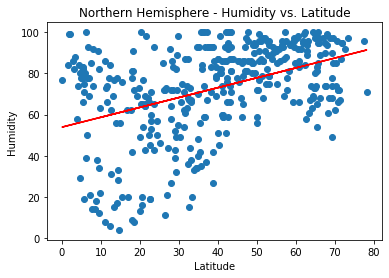

The equation of the regression line is: y = 0.48x + 53.9
The r-squared is: 0.4239947721741126


In [31]:
# gather regression data

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Humidity vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is a positive coorelation between humidity and lat in the north but it isn't very strong. I think it makes sense that it isn't very strong. Humidity seems unrelated to lat

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [32]:
# TEACHER OUTPUT

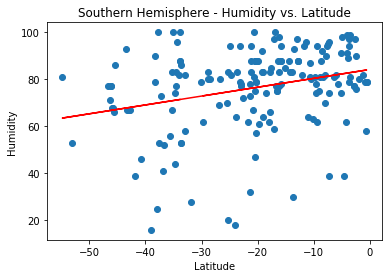

The equation of the regression line is: y = 0.38x + 84.19
The r-squared is: 0.2845180924372142


In [33]:
# gather regression data

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Humidity vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Humidity")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is a positive coorelation between humidity and lat in the south but it isn't very strong. I think it makes sense that it isn't very strong. Humidity seems unrelated to lat

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [34]:
# TEACHER OUTPUT

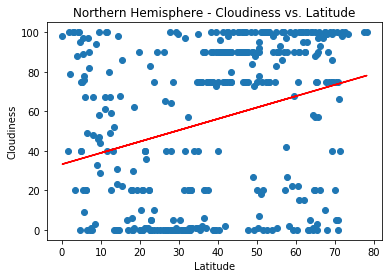

The equation of the regression line is: y = 0.57x + 33.19
The r-squared is: 0.28934316988578085


In [35]:
# gather regression data

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is a positive coorelation between cloudiness and lat in the north but it isn't strong. I think it makes sense that it isn't strong. Cloudiness seems unrelated to lat

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [36]:
# TEACHER OUTPUT

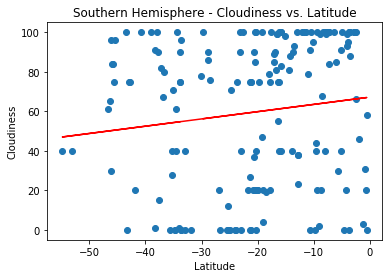

The equation of the regression line is: y = 0.37x + 67.19
The r-squared is: 0.12830699901557652


In [37]:
# gather regression data

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Cloudiness vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Cloudiness")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is a positive coorelation between cloudiness and lat in the south but it isn't strong. I think it makes sense that it isn't strong. Cloudiness seems unrelated to lat

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [38]:
# TEACHER OUTPUT

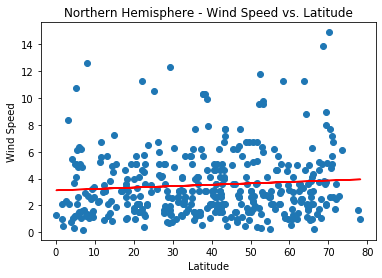

The equation of the regression line is: y = 0.01x + 3.12
The r-squared is: 0.08533972376786816


In [39]:
# gather regression data

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Northern Hemisphere - Wind Speed vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is no coorelation between wind speed and lat in the north. This makes sense. Wind speed would be related to coast line

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [40]:
# TEACHER OUTPUT

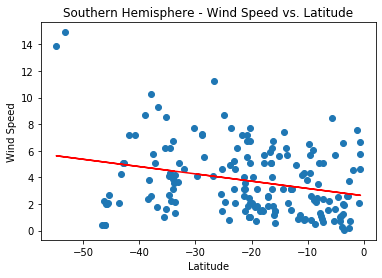

The equation of the regression line is: y = -0.05x + 2.61
The r-squared is: -0.27303474858830834


In [41]:
# gather regression data

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# create equation to overlay line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the scatter plot
plt.scatter(x_values,y_values)
# place regression line on top
plt.plot(x_values,regress_values,"r-")

plt.title("Southern Hemisphere - Wind Speed vs. Latitude")

plt.xlabel("Latitude")

plt.ylabel("Wind Speed")

# print some regression data
plt.show()
print(f"The equation of the regression line is: {line_eq}")
print(f"The r-squared is: {rvalue}")

There is no coorelation between wind speed and lat in the south. This makes sense. Wind speed would be related to coast line